<a href="https://colab.research.google.com/github/ummaysumaiya0808/False-data-detection-over-smart-metre-reading/blob/main/FalseDataDetection(FDD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import plotly.express as px
import string
import re

The excel file ***SM_detection_Excel.xlsx*** is captured from ***CEEW - Smart meter data Bareilly 2021*** file from kaggle datasets - https://www.kaggle.com/datasets/jehanbhathena/smart-meter-data-mathura-and-bareilly.

In [ ]:
df=pd.read_excel('/content/SM_detection_Excel.xlsx')

In [ ]:
df

,Time_stamp,kWh,Avg Voltage (V),Avg Current (Amp),Freq (Hz),Meter_Name,Bills/unit,TARGET
0,2021-01-02 00:00:00,0.002,253.36,0.25,50.09,BR02,4.20,0
1,2021-01-02 00:03:00,0.002,253.87,0.25,50.11,BR02,4.20,0
2,2021-01-02 00:06:00,0.020,253.25,1.67,50.14,BR02,7.20,0
3,2021-01-02 00:09:00,0.045,252.20,3.52,50.12,BR02,10.00,1
4,2021-01-02 00:12:00,0.044,252.28,3.53,50.07,BR02,7.20,0
...,...,...,...,...,...,...,...,...
202,2021-01-01 12:09:00,0.053,232.01,4.65,49.98,BR19,5.10,0
203,2021-01-01 12:12:00,0.047,232.81,4.02,49.92,BR19,7.35,0
204,2021-01-01 12:15:00,0.041,232.92,3.63,49.94,BR19,7.30,0
205,2021-01-01 12:18:00,0.039,232.53,3.35,50.00,BR19,6.98,0


In [ ]:
df=df.drop(['Time_stamp'], axis=1)
df.head()

,kWh,Avg Voltage (V),Avg Current (Amp),Freq (Hz),Meter_Name,Bills/unit,TARGET
0,0.002,253.36,0.25,50.09,BR02,4.2,0
1,0.002,253.87,0.25,50.11,BR02,4.2,0
2,0.020,253.25,1.67,50.14,BR02,7.2,0
3,0.045,252.20,3.52,50.12,BR02,10.0,1
4,0.044,252.28,3.53,50.07,BR02,7.2,0


In [ ]:
df['kWh']

0      0.002
1      0.002
2      0.020
3      0.045
4      0.044
       ...  
202    0.053
203    0.047
204    0.041
205    0.039
206    0.012
Name: kWh, Length: 207, dtype: float64

In [ ]:
x=df.drop(['TARGET'], axis=1)
x

,kWh,Avg Voltage (V),Avg Current (Amp),Freq (Hz),Meter_Name,Bills/unit
0,0.002,253.36,0.25,50.09,BR02,4.20
1,0.002,253.87,0.25,50.11,BR02,4.20
2,0.020,253.25,1.67,50.14,BR02,7.20
3,0.045,252.20,3.52,50.12,BR02,10.00
4,0.044,252.28,3.53,50.07,BR02,7.20
...,...,...,...,...,...,...
202,0.053,232.01,4.65,49.98,BR19,5.10
203,0.047,232.81,4.02,49.92,BR19,7.35
204,0.041,232.92,3.63,49.94,BR19,7.30
205,0.039,232.53,3.35,50.00,BR19,6.98


In [ ]:
y=df['TARGET']
y

0      0
1      0
2      0
3      1
4      0
      ..
202    0
203    0
204    0
205    0
206    1
Name: TARGET, Length: 207, dtype: int64

In [ ]:
x['kwh_Vavg_Iavg_Hz_M_Bill'] = x.apply(lambda row: '_'.join(map(str, row)), axis=1)
x

,kWh,Avg Voltage (V),Avg Current (Amp),Freq (Hz),Meter_Name,Bills/unit,kwh_Vavg_Iavg_Hz_M_Bill
0,0.002,253.36,0.25,50.09,BR02,4.20,0.002_253.36_0.25_50.09_BR02_4.2
1,0.002,253.87,0.25,50.11,BR02,4.20,0.002_253.87_0.25_50.11_BR02_4.2
2,0.020,253.25,1.67,50.14,BR02,7.20,0.02_253.25_1.67_50.14_BR02_7.2
3,0.045,252.20,3.52,50.12,BR02,10.00,0.045_252.2_3.52_50.12_BR02_10.0
4,0.044,252.28,3.53,50.07,BR02,7.20,0.044_252.28_3.53_50.07_BR02_7.2
...,...,...,...,...,...,...,...
202,0.053,232.01,4.65,49.98,BR19,5.10,0.053_232.01_4.65_49.98_BR19_5.1
203,0.047,232.81,4.02,49.92,BR19,7.35,0.047_232.81_4.02_49.92_BR19_7.35
204,0.041,232.92,3.63,49.94,BR19,7.30,0.041_232.92_3.63_49.94_BR19_7.3
205,0.039,232.53,3.35,50.00,BR19,6.98,0.039_232.53_3.35_50.0_BR19_6.98


In [ ]:
df2=x.drop(['kWh','Avg Voltage (V)','Avg Current (Amp)'], axis=1)
df2

,Freq (Hz),Meter_Name,Bills/unit,kwh_Vavg_Iavg_Hz_M_Bill
0,50.09,BR02,4.20,0.002_253.36_0.25_50.09_BR02_4.2
1,50.11,BR02,4.20,0.002_253.87_0.25_50.11_BR02_4.2
2,50.14,BR02,7.20,0.02_253.25_1.67_50.14_BR02_7.2
3,50.12,BR02,10.00,0.045_252.2_3.52_50.12_BR02_10.0
4,50.07,BR02,7.20,0.044_252.28_3.53_50.07_BR02_7.2
...,...,...,...,...
202,49.98,BR19,5.10,0.053_232.01_4.65_49.98_BR19_5.1
203,49.92,BR19,7.35,0.047_232.81_4.02_49.92_BR19_7.35
204,49.94,BR19,7.30,0.041_232.92_3.63_49.94_BR19_7.3
205,50.00,BR19,6.98,0.039_232.53_3.35_50.0_BR19_6.98


In [ ]:
# ' Freq (Hz)', 'Meter_Name',' Bills/unit'
df3=df2.drop(['Freq (Hz)','Meter_Name','Bills/unit'], axis=1)
df3.head()

,kwh_Vavg_Iavg_Hz_M_Bill
0,0.002_253.36_0.25_50.09_BR02_4.2
1,0.002_253.87_0.25_50.11_BR02_4.2
2,0.02_253.25_1.67_50.14_BR02_7.2
3,0.045_252.2_3.52_50.12_BR02_10.0
4,0.044_252.28_3.53_50.07_BR02_7.2


In [ ]:
result_df = pd.concat([df3, y], axis=1)
print(result_df)

               kwh_Vavg_Iavg_Hz_M_Bill  TARGET
0     0.002_253.36_0.25_50.09_BR02_4.2       0
1     0.002_253.87_0.25_50.11_BR02_4.2       0
2      0.02_253.25_1.67_50.14_BR02_7.2       0
3     0.045_252.2_3.52_50.12_BR02_10.0       1
4     0.044_252.28_3.53_50.07_BR02_7.2       0
..                                 ...     ...
202   0.053_232.01_4.65_49.98_BR19_5.1       0
203  0.047_232.81_4.02_49.92_BR19_7.35       0
204   0.041_232.92_3.63_49.94_BR19_7.3       0
205   0.039_232.53_3.35_50.0_BR19_6.98       0
206   0.012_232.59_0.99_50.03_BR19_8.0       1

[207 rows x 2 columns]


In [ ]:
data=result_df
data

,kwh_Vavg_Iavg_Hz_M_Bill,TARGET
0,0.002_253.36_0.25_50.09_BR02_4.2,0
1,0.002_253.87_0.25_50.11_BR02_4.2,0
2,0.02_253.25_1.67_50.14_BR02_7.2,0
3,0.045_252.2_3.52_50.12_BR02_10.0,1
4,0.044_252.28_3.53_50.07_BR02_7.2,0
...,...,...
202,0.053_232.01_4.65_49.98_BR19_5.1,0
203,0.047_232.81_4.02_49.92_BR19_7.35,0
204,0.041_232.92_3.63_49.94_BR19_7.3,0
205,0.039_232.53_3.35_50.0_BR19_6.98,0


In [ ]:
data['kwh_Vavg_Iavg_Hz_M_Bill'][0] # User's real information of power consumption//.

'0.002_253.36_0.25_50.09_BR02_4.2'

In [ ]:
data['kwh_Vavg_Iavg_Hz_M_Bill'][1] # Misleaded wrong information by anomalous party.

'0.002_253.87_0.25_50.11_BR02_4.2'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   kwh_Vavg_Iavg_Hz_M_Bill  207 non-null    object
 1   TARGET                   207 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
data.isnull().sum()

kwh_Vavg_Iavg_Hz_M_Bill    0
TARGET                     0
dtype: int64

In [ ]:
target_status=data['TARGET'].value_counts()
transactions= target_status.index
quantity=target_status.values

figure=px.pie(data, values=quantity,
              names=transactions, hole=.60,
              title='False and real power usage')
figure.show()

#Plotting wordcloud

In [ ]:
text=data['kwh_Vavg_Iavg_Hz_M_Bill']
text

0       0.002_253.36_0.25_50.09_BR02_4.2
1       0.002_253.87_0.25_50.11_BR02_4.2
2        0.02_253.25_1.67_50.14_BR02_7.2
3       0.045_252.2_3.52_50.12_BR02_10.0
4       0.044_252.28_3.53_50.07_BR02_7.2
                     ...                
202     0.053_232.01_4.65_49.98_BR19_5.1
203    0.047_232.81_4.02_49.92_BR19_7.35
204     0.041_232.92_3.63_49.94_BR19_7.3
205     0.039_232.53_3.35_50.0_BR19_6.98
206     0.012_232.59_0.99_50.03_BR19_8.0
Name: kwh_Vavg_Iavg_Hz_M_Bill, Length: 207, dtype: object

In [ ]:
# Convert numeric data to a string.
text_data = '  '.join(map(str, text))
text_data

'0.002_253.36_0.25_50.09_BR02_4.2  0.002_253.87_0.25_50.11_BR02_4.2  0.02_253.25_1.67_50.14_BR02_7.2  0.045_252.2_3.52_50.12_BR02_10.0  0.044_252.28_3.53_50.07_BR02_7.2  0.042_252.51_3.15_50.1_BR02_7.1  0.001_253.97_0.14_50.08_BR02_3.3  0.001_253.93_0.14_50.03_BR02_4.5  0.001_253.79_0.14_50.0_BR02_3.3  0.001_253.81_0.14_50.02_BR02_8.0  0.001_254.18_0.14_50.04_BR02_3.3  0.001_254.2_0.14_50.03_BR02_3.3  0.0_256.16_0.13_50.05_BR02_0.0  0.001_255.79_0.13_50.01_BR02_7.0  0.001_250.45_0.13_49.89_BR02_3.3  0.001_250.01_0.18_49.84_BR02_7.0  0.001_249.75_0.18_49.82_BR02_3.3  0.001_251.05_0.11_49.86_BR02_4.0  0.0_251.24_0.11_49.94_BR02_0.0  0.009_253.0_1.23_50.04_BR04_12.13  0.009_252.67_1.22_50.01_BR04_6.0  0.008_254.04_1.03_50.0_BR04_5.5  0.004_253.56_0.56_50.06_BR04_4.9  0.003_254.03_0.56_50.14_BR04_7.0  0.004_253.61_0.55_50.16_BR04_4.9  0.004_254.98_0.57_50.23_BR04_4.9  0.004_254.47_0.57_50.11_BR04_2.0  0.003_254.24_0.56_50.0_BR04_4.8  0.004_253.32_0.57_49.9_BR04_4.9  0.004_252.86_0.55_49.94

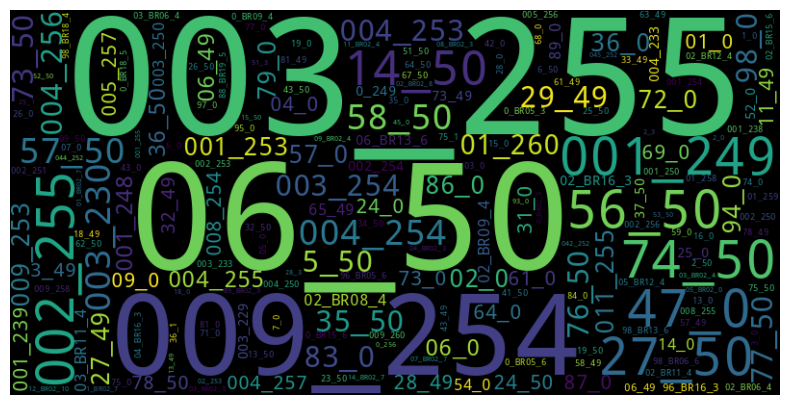

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Remove axis labels
plt.show()
fake_text= ' '.join(data[data['TARGET'] == 1]['kwh_Vavg_Iavg_Hz_M_Bill'])
real_text= ' '.join(data[data['TARGET'] == 0]['kwh_Vavg_Iavg_Hz_M_Bill'])

In [ ]:
data

,kwh_Vavg_Iavg_Hz_M_Bill,TARGET
0,0.002_253.36_0.25_50.09_BR02_4.2,0
1,0.002_253.87_0.25_50.11_BR02_4.2,0
2,0.02_253.25_1.67_50.14_BR02_7.2,0
3,0.045_252.2_3.52_50.12_BR02_10.0,1
4,0.044_252.28_3.53_50.07_BR02_7.2,0
...,...,...
202,0.053_232.01_4.65_49.98_BR19_5.1,0
203,0.047_232.81_4.02_49.92_BR19_7.35,0
204,0.041_232.92_3.63_49.94_BR19_7.3,0
205,0.039_232.53_3.35_50.0_BR19_6.98,0


Importing to the variables for training and testing//.

In [ ]:
x=data.kwh_Vavg_Iavg_Hz_M_Bill.values #Independent Variable
y=data.TARGET.values #Dependent Variable////

In [ ]:
#To sort out duplicate news:
data.drop_duplicates(inplace= True)

# Split data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.35, random_state=42)

In [ ]:
#For data preprocessing,
from sklearn.feature_extraction.text import CountVectorizer #To process the kwh_Vavg_Iavg_Hz_M_Bill into the numeric format//

In [ ]:
cv=CountVectorizer() # Creating object for CountVectorizer.
x_train=cv.fit_transform(xtrain)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# ML algorithm: Naive Bayes (NB)

In [ ]:
#Importing multinomial naive bayes algorithm.
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Creating object for MultinomialNB.
model=MultinomialNB()
model.fit(x_train,ytrain)

MultinomialNB()

In [ ]:
x_test=cv.transform(xtest)

In [ ]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model.score(x_test,ytest) #To check the accuracy of model

0.6027397260273972

In [ ]:
#To create an input object:
UsagePower_info= ['0.045_252.2_3.52_50.12_BR02_10.0','0.001_253.97_0.14_50.08_BR02_3.3']

In [ ]:
Detect=cv.transform(UsagePower_info)

In [ ]:
model.predict(Detect)

array([1, 0])

So, here the 1st user input '1' remains false data and 2nd one '0' is true data of the power usage and bills.

# Performance calculation

In [ ]:
pred= model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1])

In [ ]:
accuracy_score(ytest, pred) #To compare the observative objrct(ytest) and new object(pred).

0.6027397260273972

# Confusion Matrix
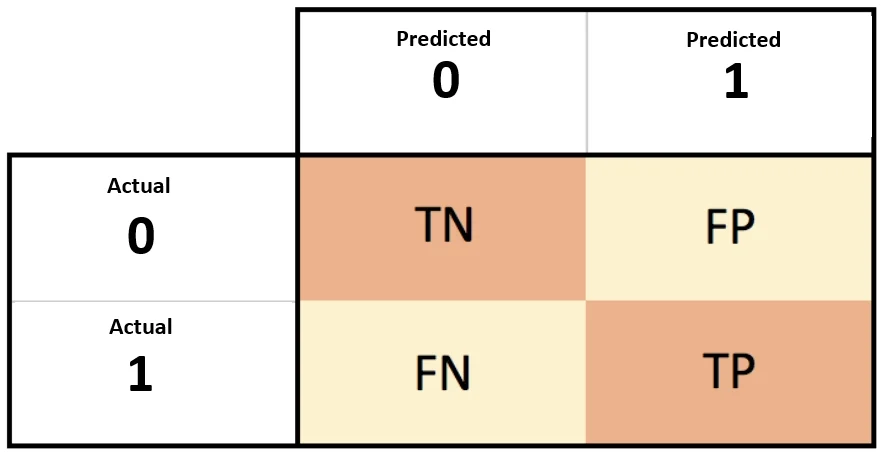

In [ ]:
confusion_matrix(ytest, pred)

array([[43,  8],
       [21,  1]])

In [ ]:
print(classification_report (ytest, pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75        51
           1       0.11      0.05      0.06        22

    accuracy                           0.60        73
   macro avg       0.39      0.44      0.41        73
weighted avg       0.50      0.60      0.54        73



Confusion Matrix: 
[[43  8]
 [21  1]]


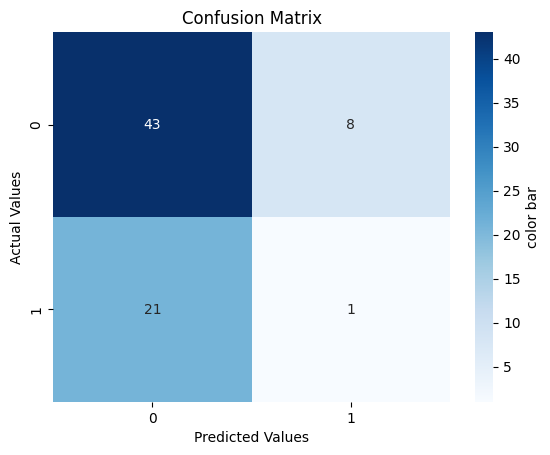

In [ ]:
#To plot confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, pred, labels=[0,1])
print('Confusion Matrix: ')
print(cm)

sns.heatmap(cm, cmap="Blues", annot=True, cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

# Users receipient data using a Chatbot

In [ ]:
data

,kwh_Vavg_Iavg_Hz_M_Bill,TARGET
0,0.002_253.36_0.25_50.09_BR02_4.2,0
1,0.002_253.87_0.25_50.11_BR02_4.2,0
2,0.02_253.25_1.67_50.14_BR02_7.2,0
3,0.045_252.2_3.52_50.12_BR02_10.0,1
4,0.044_252.28_3.53_50.07_BR02_7.2,0
...,...,...
202,0.053_232.01_4.65_49.98_BR19_5.1,0
203,0.047_232.81_4.02_49.92_BR19_7.35,0
204,0.041_232.92_3.63_49.94_BR19_7.3,0
205,0.039_232.53_3.35_50.0_BR19_6.98,0


In [ ]:
Basic_notation = ["0.002_253.36_0.25_50.09_BR02_4.2", "0.02_253.25_1.67_50.14_BR02_7.2",
             "0.044_252.28_3.53_50.07_BR02_7.2", "0.042_252.51_3.15_50.1_BR02_7.1",
             "0.001_253.97_0.14_50.08_BR02_3.3", "0.0_256.16_0.13_50.05_BR02_0.0",
             "0.005_256.86_0.5_50.02_BR06_5.0", "0.004_253.56_0.56_50.06_BR04_4.9",
             "0.009_252.67_1.22_50.01_BR04_6.0", "0.003_254.24_0.56_50.0_BR04_4.8",
             "0.007_235.79_1.24_49.96_BR05_6.0","0.008_238.75_1.28_49.96_BR05_6.0",
             "0.01_256.75_1.3_49.98_BR06_6.8", "0.011_255.62_1.32_49.95_BR06_6.85",
             "0.006_255.87_0.91_50.04_BR09_5.3", "0.013_256.25_2.07_50.19_BR11_6.9",
             "0.012_255.81_2.04_50.08_BR11_6.9", "0.009_253.71_0.72_50.06_BR13_6.23",
             "0.058_232.71_5.41_50.0_BR19_5.17",
             "0.078_232.31_6.93_50.02_BR19_5.74",
             "0.053_232.01_4.65_49.98_BR19_5.1",
             "0.047_232.81_4.02_49.92_BR19_7.35",
             "0.041_232.92_3.63_49.94_BR19_7.3",
             "0.039_232.53_3.35_50.0_BR19_6.98"]

def detect_true_data(text_data):
    for i in Basic_notation:
        if re.search(fr'\b{re.escape(i)}\b', text_data, re.IGNORECASE):
            return '''Dear consumer! Your power consumption data is valid.
            ***************✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔**************
                      cheers! have a nice time// 😊😊😊😊😊.'''
    return '''Sorry! your received power is resulting invalid :( .......
    ❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎
    There might be a third-party anomaly intrusion occur in your metre reading 😔😔😔😔😔.'''

# Taking the input data from users on smart meter
user_input = input("Enter your usage data please__: ")
result = detect_true_data(user_input)
print(result)


Enter your usage data please__: 0.012_232.59_0.99_50.03_BR19_8.0
Sorry! your received power is resulting invalid :( .......
    ❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎❎
    There might be a third-party anomaly intrusion occur in your metre reading 😔😔😔😔😔.
